# Banking Dataset Analysis and Classification

### An end-to-end data science project

**Introduction**:

The banking dataset contains a diverse range of attributes related to customer information and banking activities.
The banking dataset is commonly used for customer behavior analysis, marketing campaign evaluation, and predicting customer subscription to term deposits. It enables researchers and businesses to gain insights into customer demographics, preferences, and responses to banking initiatives.
The dataset used in this project is the [Banking Dataset Analysis and Classification](https://www.kaggle.com/competitions/banking-dataset-analysis-and-classification)

**The structure of the notebook is as follows:**

1. Importing the required libraries
2. Loading the dataset
3. Data Cleaning & EDA
4. Splitting & Preprocessing the data
5. Training and evaluating
6. Hyperparameter tuning and evaluation

## 1. Imports

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
!pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/data/Test-Set.csv')
df=pd.read_csv('/content/drive/MyDrive/data/Train-Set.csv')

## 3. Data Cleaning & EDA

#### Train Data

In [ ]:
# Checking the column names
df.columns

Index(['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
# Looking at the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  object 
dtypes: float64(1), int64(7), 

In [ ]:
# Checking the number of unique values for each column
df.nunique()

Unnamed: 0    54712
id            54712
age              79
job              12
marital           4
education        11
default           3
balance        6321
housing           3
loan              3
contact           3
day              41
month            17
duration       1545
campaign         47
pdays           526
previous         38
poutcome          5
Target            2
dtype: int64

In [ ]:
# Checking the number of missing values in each column
df.isnull().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       22870
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Target            0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

Unnamed: 0     0.000000
id             0.000000
age            0.000000
job            0.000000
marital        0.000000
education      0.000000
default        0.000000
balance       41.800702
housing        0.000000
loan           0.000000
contact        0.000000
day            0.000000
month          0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome       0.000000
Target         0.000000
dtype: float64

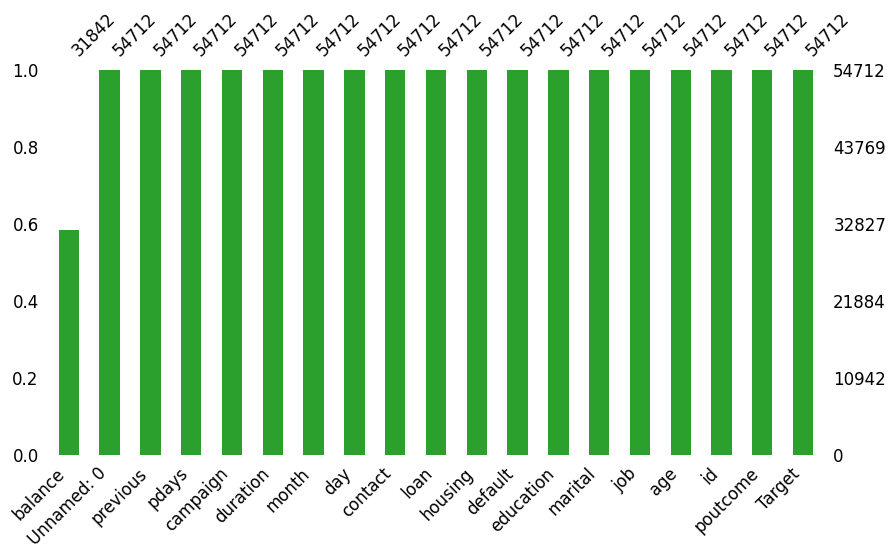

In [ ]:
# Visualizing the null values for each column
msno.bar(df, color="tab:green", sort="ascending", figsize=(10,5), fontsize=12);
# plt.show()

In [ ]:
print('Count of duplicated rows: ', df.duplicated().sum())

Count of duplicated rows:  0


#### Test Data

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23449 entries, 0 to 23448
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23449 non-null  int64  
 1   id          23449 non-null  int64  
 2   age         23449 non-null  int64  
 3   job         23449 non-null  object 
 4   marital     23449 non-null  object 
 5   education   23449 non-null  object 
 6   default     23449 non-null  object 
 7   balance     13369 non-null  float64
 8   housing     23449 non-null  object 
 9   loan        23449 non-null  object 
 10  contact     23449 non-null  object 
 11  day         23449 non-null  object 
 12  month       23449 non-null  object 
 13  duration    23449 non-null  int64  
 14  campaign    23449 non-null  int64  
 15  pdays       23449 non-null  int64  
 16  previous    23449 non-null  int64  
 17  poutcome    23449 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 3.2+ MB


In [ ]:
test.isnull().sum()/len(df)*100

Unnamed: 0     0.000000
id             0.000000
age            0.000000
job            0.000000
marital        0.000000
education      0.000000
default        0.000000
balance       18.423746
housing        0.000000
loan           0.000000
contact        0.000000
day            0.000000
month          0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome       0.000000
dtype: float64

####  dropp some columns

The reason for dropping each these columns is:
* id: not useful and high cardinality.
* Unnamed: 0 :not useful and high cardinality


In [ ]:
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
test.drop(['Unnamed: 0'], axis=1, inplace=True)

Taking a look at the remaining columns that will be used.

In [ ]:
print('Selected columns are: ')
df.columns

Selected columns are: 


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
# Checking the cardinality of the columns
df.nunique()

age            79
job            12
marital         4
education      11
default         3
balance      6321
housing         3
loan            3
contact         3
day            41
month          17
duration     1545
campaign       47
pdays         526
previous       38
poutcome        5
Target          2
dtype: int64

In [ ]:
# Checking the number of duplicated rows after removing some columns
print('Number of duplicated row on train data: ', df.duplicated().sum())

Number of duplicated row on train data:  3


In [ ]:
# # Checking the number of duplicated on test data rows after removing some columns
# print('Number of duplicated rows on test data: ', test.duplicated().sum())

In [ ]:
# Quick EDA using Pandas Profiling
# profile = ProfileReport(df, title = "Pandas Profiling Report", explorative = True)
# profile.to_widgets()

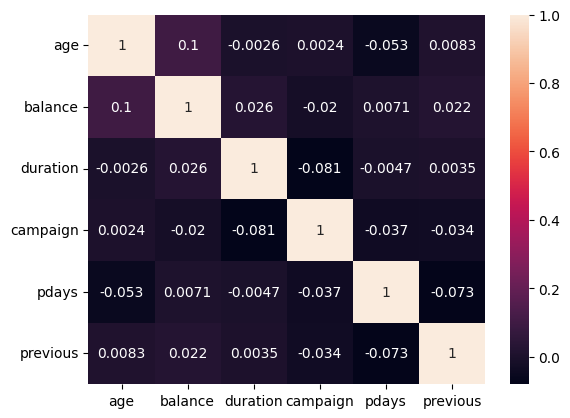

In [ ]:
# Visualizing the numerical featues using a correlation heatmap
sns.heatmap(df.corr(), annot=True);

In [ ]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,54712.000000,31842.000000,54712.000000,54712.000000,54712.000000,54712.000000
mean,40.580147,1368.024590,257.282260,2.679961,425.022829,0.407351
std,10.544504,3057.847866,255.270335,2.966822,476.813012,1.520253
min,17.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,73.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,180.000000,2.000000,88.000000,0.000000
75%,48.000000,1435.000000,318.000000,3.000000,999.000000,0.000000
max,98.000000,98417.000000,4199.000000,58.000000,999.000000,58.000000


In [ ]:
df.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance      22870
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
Target           0
dtype: int64

In [ ]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,54712.000000,31842.000000,54712.000000,54712.000000,54712.000000,54712.000000
mean,40.580147,1368.024590,257.282260,2.679961,425.022829,0.407351
std,10.544504,3057.847866,255.270335,2.966822,476.813012,1.520253
min,17.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,73.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,180.000000,2.000000,88.000000,0.000000
75%,48.000000,1435.000000,318.000000,3.000000,999.000000,0.000000
max,98.000000,98417.000000,4199.000000,58.000000,999.000000,58.000000


Now I will be taking a closer look at each feature and will be doing some data cleaning as needed.

### Feature 1: Age

#### Train Data



In [ ]:
print(df.age.min())
print(df.age.max())

17
98


In [ ]:
# Filter the DataFrame to get only rows where the 'age' column is greater than 94
filtered_df = df[df['age'] > 94]

# Display the sum of values in the 'age' column that are bigger than 94
print(filtered_df['age'].sum())

288


In [ ]:

# Histogram of the age value counts
import plotly.express as px

fig = px.histogram(df, x='age', title='Count of Each Age',
                   opacity=0.8, color_discrete_sequence=['cornflowerblue'])
fig.update_layout(bargap=0.2)
fig.show()

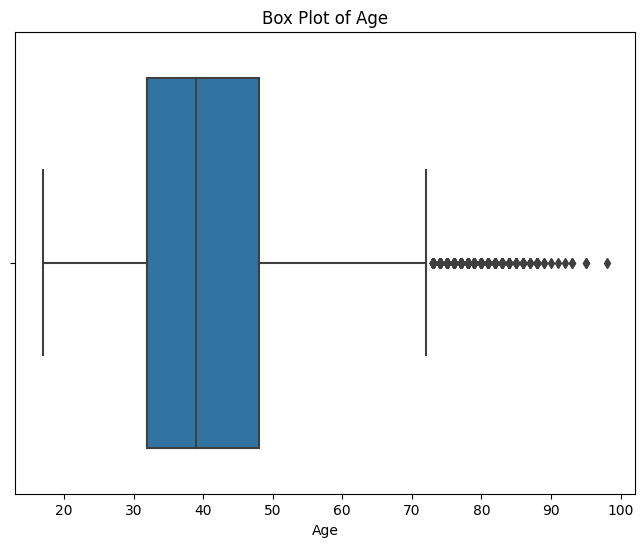

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='age')
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

#### Test Data

In [ ]:
print(test.age.min())
print(test.age.max())

17
94


In [ ]:
# Histogram of the age value counts
import plotly.express as px

fig = px.histogram(test, x='age', title='Count of Each Age',
                   opacity=0.8, color_discrete_sequence=['cornflowerblue'])
fig.update_layout(bargap=0.2)
fig.show()


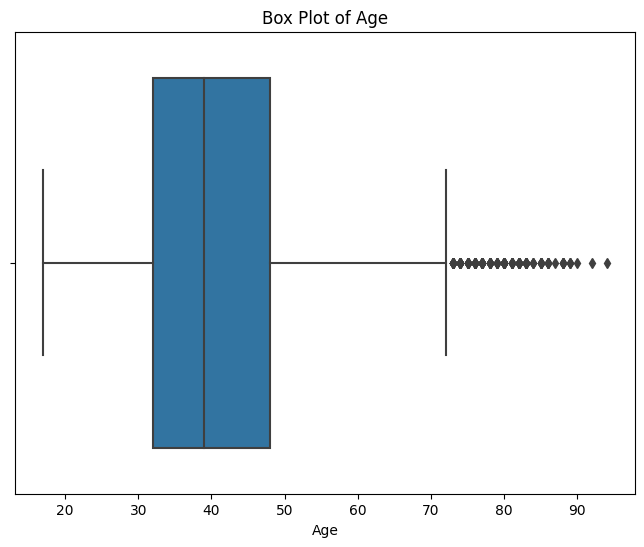

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=test, x='age')
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

### Feature 2: Job Column

#### Train Data

In [ ]:
df.job.value_counts()

blue-collar      12042
admin.            9346
technician        9122
management        8292
services          5148
retired           2557
self-employed     1883
entrepreneur      1876
unemployed        1463
housemaid         1457
student           1150
unknown            376
Name: job, dtype: int64

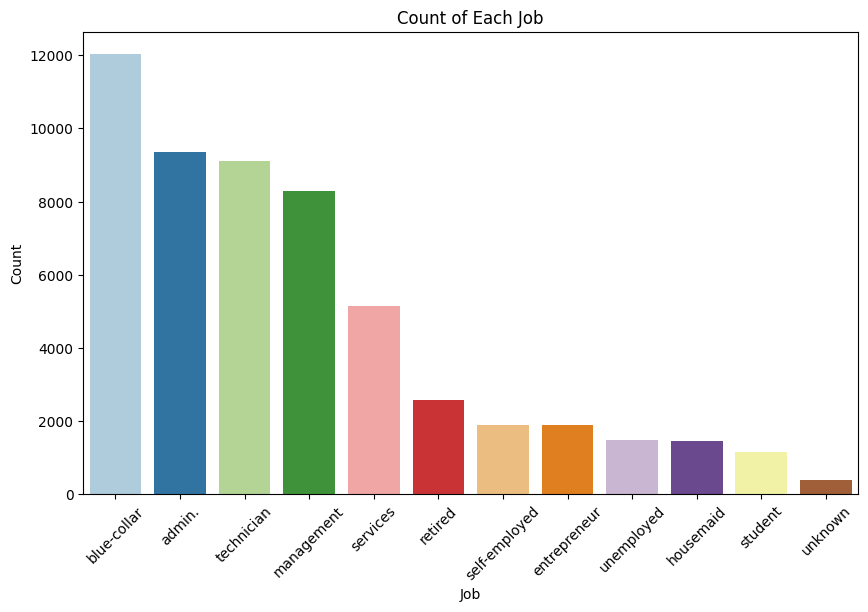

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', order=(df['job'].value_counts().sort_values(ascending=False)).index, palette="Paired")
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Count of Each Job')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


#### Test Data

In [ ]:
test.job.value_counts()

blue-collar      5131
admin.           4139
technician       3875
management       3511
services         2202
retired          1073
self-employed     795
entrepreneur      771
housemaid         638
unemployed        638
student           499
unknown           177
Name: job, dtype: int64

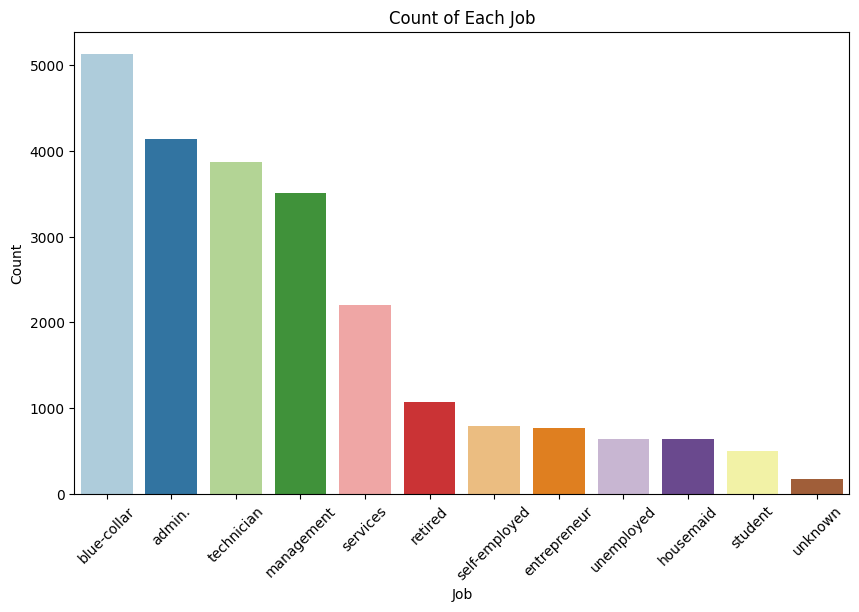

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=test, x='job', order=(df['job'].value_counts().sort_values(ascending=False)).index, palette="Paired")
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Count of Each Job')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


### Feature 3: Marital

#### Train Data

In [ ]:
df.marital.value_counts()


married     33095
single      15362
divorced     6209
unknown        46
Name: marital, dtype: int64

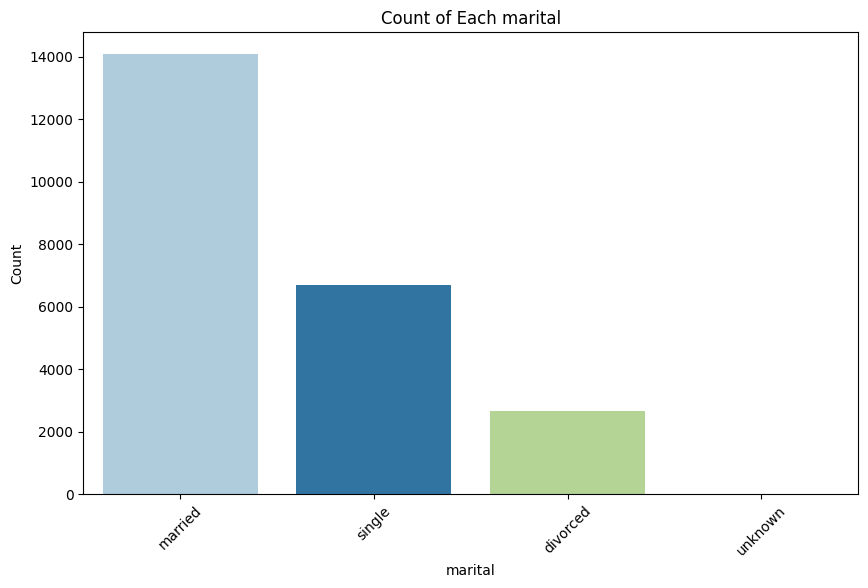

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=test, x='marital', order=(df['marital'].value_counts().sort_values(ascending=False)).index, palette="Paired")
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Count of Each marital')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
# Fill 'unknown' marital values as 'single' for rows where 'job' is 'student'
df.loc[(df['job'] == 'student') & (df['marital'] == 'unknown'), 'marital'] = 'single'

In [ ]:
# Calculate the most frequent marital status for each age
most_frequent_marital = df.groupby('age')['marital'].apply(lambda x: x.mode().iloc[0])

# Iterate through the DataFrame and fill unknown values in 'marital' based on age
for index, row in df.iterrows():
    age = row['age']
    if row['marital'] == 'unknown':
        df.at[index, 'marital'] = most_frequent_marital[age]


In [ ]:
df.marital.value_counts()

married     33130
single      15373
divorced     6209
Name: marital, dtype: int64

#### Test Data

In [ ]:
test.marital.value_counts()

married     14072
single       6685
divorced     2673
unknown        19
Name: marital, dtype: int64

In [ ]:
# Fill 'unknown' marital values as 'single' for rows where 'job' is 'student'
test.loc[(test['job'] == 'student') & (test['marital'] == 'unknown'), 'marital'] = 'single'

In [ ]:
# Calculate the most frequent marital status for each age
most_frequent_marital = test.groupby('age')['marital'].apply(lambda x: x.mode().iloc[0])

# Iterate through the DataFrame and fill unknown values in 'marital' based on age
for index, row in test.iterrows():
    age = row['age']
    if row['marital'] == 'unknown':
        test.at[index, 'marital'] = most_frequent_marital[age]


In [ ]:
test.marital.value_counts()

married     14087
single       6689
divorced     2673
Name: marital, dtype: int64

### Feature 4: Education

#### Train

In [ ]:
df.education.value_counts()

secondary              16357
tertiary                9313
university.degree       6741
high.school             5292
primary                 4854
basic.9y                3380
professional.course     2925
unknown                 2276
basic.4y                2256
basic.6y                1306
illiterate                12
Name: education, dtype: int64

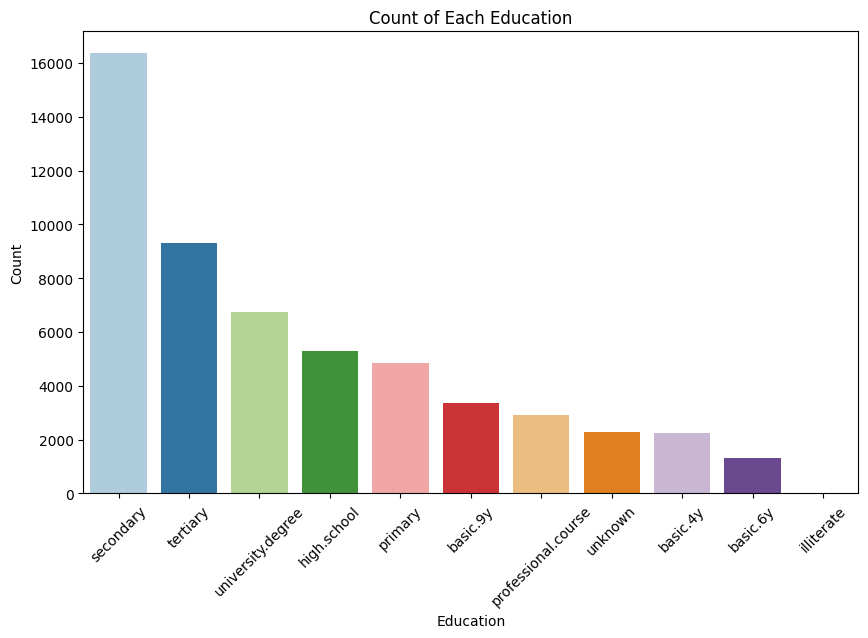

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', order=(df['education'].value_counts().sort_values(ascending=False)).index, palette="Paired")
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Each Education')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
education_mapping = {
    'primary': 'primary',
    'basic.4y': 'primary',
    'basic.6y': 'primary',
    'basic.9y': 'secondary',
    'high.school': 'secondary',
    'secondary': 'secondary',
    'tertiary': 'tertiary',
    'university.degree': 'tertiary',
    'professional.course': 'professional',
    'unknown': 'unknown',
    'illiterate': 'illiterate'
}

df['education'] = df['education'].map(education_mapping)

In [ ]:
# Calculate modes of education for each unique combination of age and job
age_job_mode_mapping = {}

for age in df['age'].unique():
    for job in df['job'].unique():
        mode_education = df[(df['age'] == age) & (df['job'] == job)]['education'].mode()
        if not mode_education.empty:
            age_job_mode_mapping[(age, job)] = mode_education.values[0]

# Iterate through the DataFrame and replace 'unknown' values with corresponding modes
for index, row in df.iterrows():
    if row['education'] == 'unknown':
        mode_education = age_job_mode_mapping.get((row['age'], row['job']))
        if mode_education:
            df.at[index, 'education'] = mode_education


In [ ]:
df.education.value_counts()

secondary       26292
tertiary        16405
primary          8858
professional     2929
unknown           216
illiterate         12
Name: education, dtype: int64

In [ ]:
# Calculate modes of education for each unique age value
age_mode_mapping = {}

for age in df['age'].unique():
    mode_education = df[df['age'] == age]['education'].mode()
    if not mode_education.empty:
        age_mode_mapping[age] = mode_education.values[0]

# Iterate through the DataFrame and replace 'unknown' values with corresponding modes
for index, row in df.iterrows():
    if row['education'] == 'unknown':
        mode_education = age_mode_mapping.get(row['age'])
        if mode_education:
            df.at[index, 'education'] = mode_education

In [ ]:
df.education.value_counts()

secondary       26474
tertiary        16405
primary          8877
professional     2929
unknown            15
illiterate         12
Name: education, dtype: int64

In [ ]:
df["education"].replace(["unknown"],df["education"].mode(), inplace=True)

#### Test

In [ ]:
test.education.value_counts()

secondary              6845
tertiary               3988
university.degree      2995
high.school            2304
primary                1997
basic.9y               1446
professional.course    1267
basic.4y               1066
unknown                 978
basic.6y                559
illiterate                4
Name: education, dtype: int64

In [ ]:
education_mapping = {
    'primary': 'primary',
    'basic.4y': 'primary',
    'basic.6y': 'primary',
    'basic.9y': 'secondary',
    'high.school': 'secondary',
    'secondary': 'secondary',
    'tertiary': 'tertiary',
    'university.degree': 'tertiary',
    'professional.course': 'professional',
    'unknown': 'unknown',
    'illiterate': 'illiterate'
}

test['education'] = test['education'].map(education_mapping)

In [ ]:
test.education.value_counts()

secondary       10595
tertiary         6983
primary          3622
professional     1267
unknown           978
illiterate          4
Name: education, dtype: int64

In [ ]:
# Calculate modes of education for each unique combination of age and job
age_job_mode_mapping = {}

for age in test['age'].unique():
    for job in test['job'].unique():
        mode_education = test[(test['age'] == age) & (test['job'] == job)]['education'].mode()
        if not mode_education.empty:
            age_job_mode_mapping[(age, job)] = mode_education.values[0]

# Iterate through the DataFrame and replace 'unknown' values with corresponding modes
for index, row in test.iterrows():
    if row['education'] == 'unknown':
        mode_education = age_job_mode_mapping.get((row['age'], row['job']))
        if mode_education:
            test.at[index, 'education'] = mode_education

In [ ]:
test.education.value_counts()

secondary       11193
tertiary         7153
primary          3775
professional     1267
unknown            57
illiterate          4
Name: education, dtype: int64

In [ ]:
# Calculate modes of education for each unique age value
age_mode_mapping = {}

for age in test['age'].unique():
    mode_education = test[test['age'] == age]['education'].mode()
    if not mode_education.empty:
        age_mode_mapping[age] = mode_education.values[0]

# Iterate through the DataFrame and replace 'unknown' values with corresponding modes
for index, row in test.iterrows():
    if row['education'] == 'unknown':
        mode_education = age_mode_mapping.get(row['age'])
        if mode_education:
            test.at[index, 'education'] = mode_education

In [ ]:
test.education.value_counts()

secondary       11230
tertiary         7156
primary          3784
professional     1267
unknown             8
illiterate          4
Name: education, dtype: int64

In [ ]:
test["education"].replace(["unknown"],test["education"].mode(), inplace=True)

### Feature 5: Default

#### Train Data

In [ ]:
# value counts
df['default'].value_counts()

no         49368
unknown     4754
yes          590
Name: default, dtype: int64

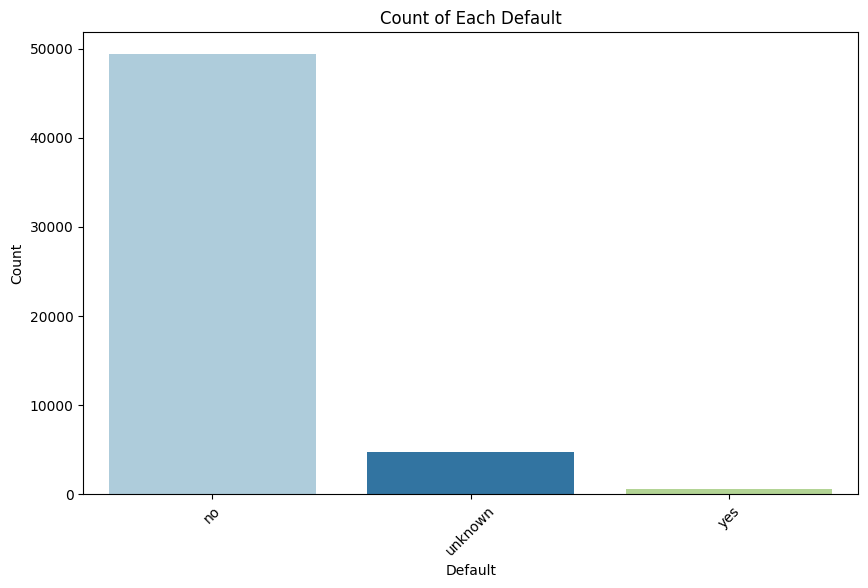

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default', order=(df['default'].value_counts().sort_values(ascending=False)).index, palette="Paired")
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Count of Each Default')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
for index, row in df.iterrows():
    if row['default'] == 'unknown':
        if row['loan'] == 'yes' or row['housing'] == 'yes':
            df.at[index, 'default'] = 'yes'
        else:
            df.at[index, 'default'] = 'no'

In [ ]:
# value counts
df['default'].value_counts()

no     51429
yes     3283
Name: default, dtype: int64

#### Test Data

In [ ]:
# value counts
test['default'].value_counts()

no         21035
unknown     2186
yes          228
Name: default, dtype: int64

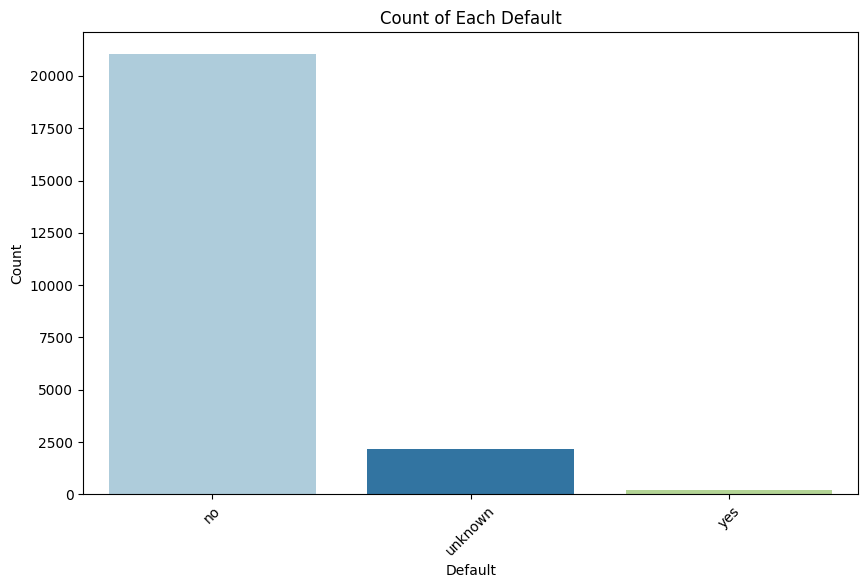

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=test, x='default', order=(test['default'].value_counts().sort_values(ascending=False)).index, palette="Paired")
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Count of Each Default')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
for index, row in test.iterrows():
    if row['default'] == 'unknown':
        if row['loan'] == 'yes' or row['housing'] == 'yes':
            test.at[index, 'default'] = 'yes'
        else:
            test.at[index, 'default'] = 'no'

In [ ]:
# value counts
test['default'].value_counts()

no     21961
yes     1488
Name: default, dtype: int64

### Feature 6: Balance

#### Train Data

In [ ]:
df.balance.describe()

count    31842.000000
mean      1368.024590
std       3057.847866
min      -8019.000000
25%         73.000000
50%        449.000000
75%       1435.000000
max      98417.000000
Name: balance, dtype: float64

In [ ]:
df.balance.isnull().sum()/len(df)*100

41.80070185699664

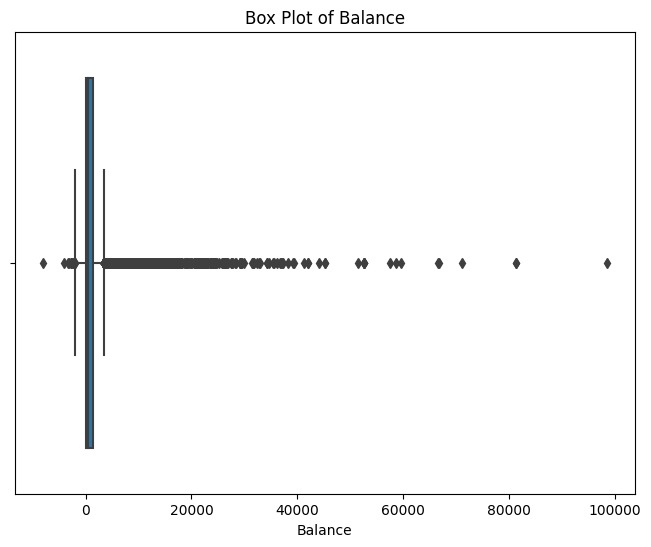

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='balance')
plt.xlabel('Balance')
plt.title('Box Plot of Balance')
plt.show()

In [ ]:
# Calculate the average balance for each age
average_balances = df.groupby('age')['balance'].mean()

# Iterate through the DataFrame and fill null values with average balance
for index, row in df.iterrows():
    age = row['age']
    if pd.isnull(row['balance']):
        df.at[index, 'balance'] = average_balances[age]

In [ ]:
median_balance = df['balance'].median()
df['balance'].fillna(median_balance, inplace=True)

In [ ]:
df.balance.isnull().sum()

0

#### Test Data

In [ ]:
test.balance.describe()

count     13369.000000
mean       1348.570798
std        3013.448064
min       -6847.000000
25%          71.000000
50%         446.000000
75%        1401.000000
max      102127.000000
Name: balance, dtype: float64

In [ ]:
test.balance.isnull().sum()/len(test)*100

42.98690775726044

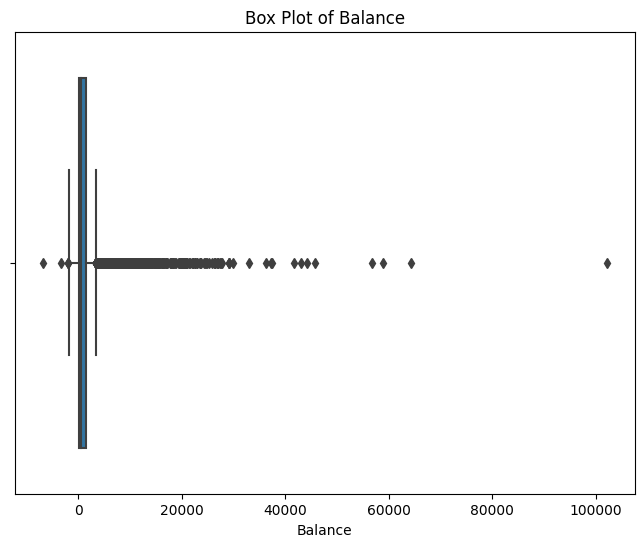

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=test, x='balance')
plt.xlabel('Balance')
plt.title('Box Plot of Balance')
plt.show()

In [ ]:
# Calculate the average balance for each age
average_balances = test.groupby('age')['balance'].mean()

# Iterate through the DataFrame and fill null values with average balance
for index, row in test.iterrows():
    age = row['age']
    if pd.isnull(row['balance']):
        test.at[index, 'balance'] = average_balances[age]

In [ ]:
median_balance = test['balance'].median()
test['balance'].fillna(median_balance, inplace=True)

In [ ]:
test.balance.isnull().sum()

0

### Feature 7: New_Loan

#### Train

In [ ]:
# Checking value counts
df['housing'].value_counts()

yes        29666
no         24503
unknown      543
Name: housing, dtype: int64

In [ ]:
# Checking value counts
df['loan'].value_counts()

no         45564
yes         8605
unknown      543
Name: loan, dtype: int64

In [ ]:
# Create a new_loan column with default value 'unknown'
df['new_loan'] = 'unknown'

# Update the new_loan column based on the conditions
df.loc[(df['housing'] == 'yes') | (df['loan'] == 'yes'), 'new_loan'] = 'yes'
df.loc[(df['housing'] == 'no') & (df['loan'] == 'no'), 'new_loan'] = 'no'
df.loc[((df['housing'] == 'unknown') & (df['loan'] == 'yes')) | ((df['housing'] == 'yes') & (df['loan'] == 'unknown')), 'new_loan'] = 'yes'
df.loc[((df['housing'] == 'unknown') & (df['loan'] == 'no')) | ((df['housing'] == 'no') & (df['loan'] == 'unknown')), 'new_loan'] = 'no'


In [ ]:
df.loc[(df['default'] == 'no') & (df['new_loan'] == 'unknown'), 'new_loan'] = 'no'
df.loc[(df['default'] == 'yes') & (df['new_loan'] == 'unknown'), 'new_loan'] = 'yes'


In [ ]:
df['new_loan'].value_counts()

yes    33081
no     21631
Name: new_loan, dtype: int64

In [ ]:
# Drop 'housing' and 'loan' columns
df.drop(['housing', 'loan'], axis=1, inplace=True)


#### Test

In [ ]:
# Checking value counts
test['housing'].value_counts()

yes        12718
no         10478
unknown      253
Name: housing, dtype: int64

In [ ]:
# Checking value counts
test['loan'].value_counts()

no         19534
yes         3662
unknown      253
Name: loan, dtype: int64

In [ ]:
# Create a new_loan column with default value 'unknown'
test['new_loan'] = 'unknown'

# Update the new_loan column based on the conditions
test.loc[(test['housing'] == 'yes') | (test['loan'] == 'yes'), 'new_loan'] = 'yes'
test.loc[(test['housing'] == 'no') & (test['loan'] == 'no'), 'new_loan'] = 'no'
test.loc[((test['housing'] == 'unknown') & (test['loan'] == 'yes')) | ((test['housing'] == 'yes') & (test['loan'] == 'unknown')), 'new_loan'] = 'yes'
test.loc[((test['housing'] == 'unknown') & (test['loan'] == 'no')) | ((test['housing'] == 'no') & (test['loan'] == 'unknown')), 'new_loan'] = 'no'


In [ ]:
test.loc[(test['default'] == 'no') & (test['new_loan'] == 'unknown'), 'new_loan'] = 'no'
test.loc[(test['default'] == 'yes') & (test['new_loan'] == 'unknown'), 'new_loan'] = 'yes'


In [ ]:
test['new_loan'].value_counts()

yes    14233
no      9216
Name: new_loan, dtype: int64

In [ ]:
# Drop 'housing' and 'loan' columns
test.drop(['housing', 'loan'], axis=1, inplace=True)

In [ ]:
test

,id,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,new_loan
0,74249,34,admin.,married,tertiary,no,1102.578073,cellular,jul,wed,266,1,999,0,nonexistent,no
1,35779,31,management,single,tertiary,no,165.000000,cellular,8,aug,523,2,-1,0,unknown,yes
2,66769,28,blue-collar,single,secondary,no,1067.729231,telephone,may,fri,489,2,999,0,nonexistent,no
3,27888,57,admin.,divorced,secondary,no,1878.000000,cellular,17,nov,219,1,-1,0,unknown,yes
4,63306,55,management,divorced,tertiary,no,277.000000,cellular,12,aug,101,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,36,blue-collar,married,primary,no,1160.602862,telephone,may,fri,203,5,999,0,nonexistent,no
23445,39745,44,services,married,secondary,no,133.000000,cellular,29,jan,202,3,-1,0,unknown,no
23446,40150,31,blue-collar,married,secondary,no,1150.419753,cellular,jul,wed,590,1,999,0,nonexistent,yes
23447,6012,43,management,divorced,secondary,no,1673.756447,cellular,nov,mon,488,2,999,0,nonexistent,yes


### Feature 8: Contact

#### Train Data

In [ ]:
df['contact'].value_counts()

cellular     35134
telephone    10424
unknown       9154
Name: contact, dtype: int64

In [ ]:
df["contact"].replace(["unknown"],df["contact"].mode(), inplace=True)

In [ ]:
df['contact'].value_counts()

cellular     44288
telephone    10424
Name: contact, dtype: int64

#### Test Data

In [ ]:
df['contact'].value_counts()

cellular     44288
telephone    10424
Name: contact, dtype: int64

In [ ]:
test["contact"].replace(["unknown"],test["contact"].mode(), inplace=True)

In [ ]:
df['contact'].value_counts()

cellular     44288
telephone    10424
Name: contact, dtype: int64

### Feature 9: Duration

#### Train Data

In [ ]:
print(df.duration.min())
print(df.duration.max())

0
4199


In [ ]:
fig = px.histogram(df, x='duration', title='Count of Each duration',
                   opacity=0.8, color_discrete_sequence=['cornflowerblue'])
fig.update_layout(bargap=0.2)
fig.show()

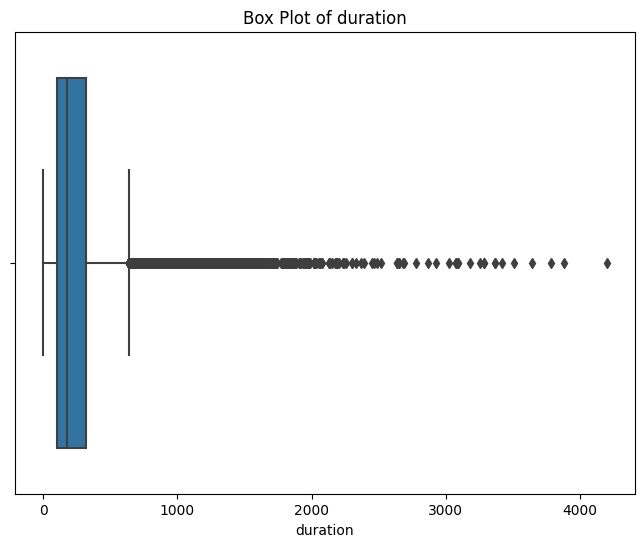

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='duration')
plt.xlabel('duration')
plt.title('Box Plot of duration')
plt.show()

In [ ]:
# Function to convert seconds to hours
def seconds_to_minutes(seconds):
    return seconds / 60

# Apply the conversion to each row in the 'duration_seconds' column and create a new 'duration_hours' column
df['duration'] = df['duration'].apply(seconds_to_minutes)

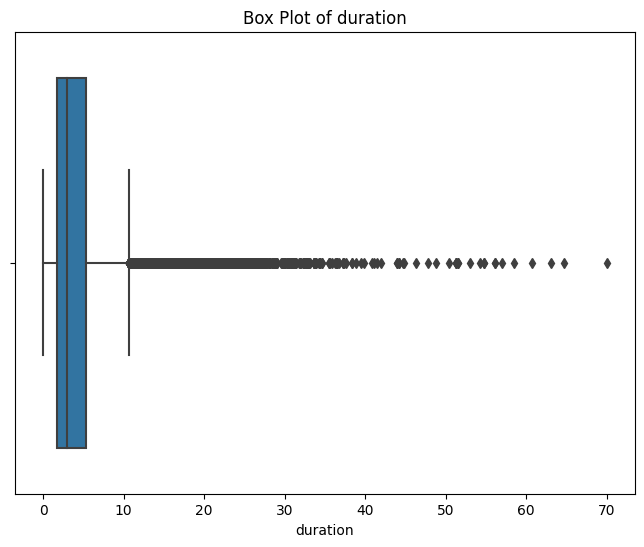

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='duration')
plt.xlabel('duration')
plt.title('Box Plot of duration')
plt.show()

#### Test Data

In [ ]:
print(test.duration.min())
print(test.duration.max())

0
4918


In [ ]:
fig = px.histogram(test, x='duration', title='Count of Each duration',
                   opacity=0.8, color_discrete_sequence=['cornflowerblue'])
fig.update_layout(bargap=0.2)
fig.show()

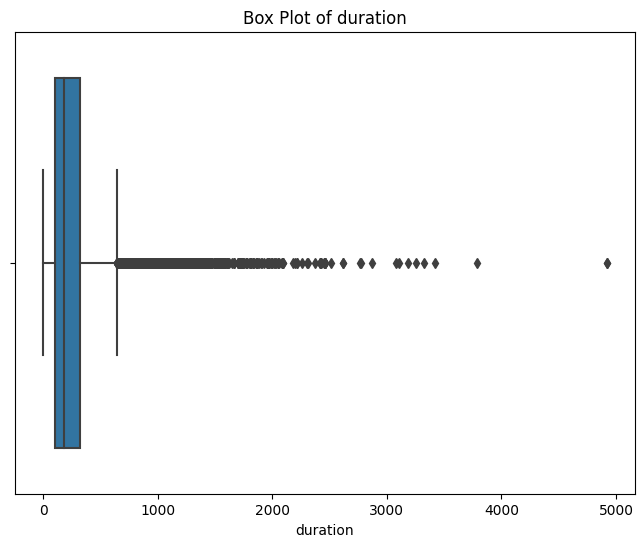

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=test, x='duration')
plt.xlabel('duration')
plt.title('Box Plot of duration')
plt.show()

In [ ]:
# Function to convert seconds to hours
def seconds_to_minutes(seconds):
    return seconds / 60

# Apply the conversion to each row in the 'duration_seconds' column and create a new 'duration_hours' column
test['duration'] = test['duration'].apply(seconds_to_minutes)

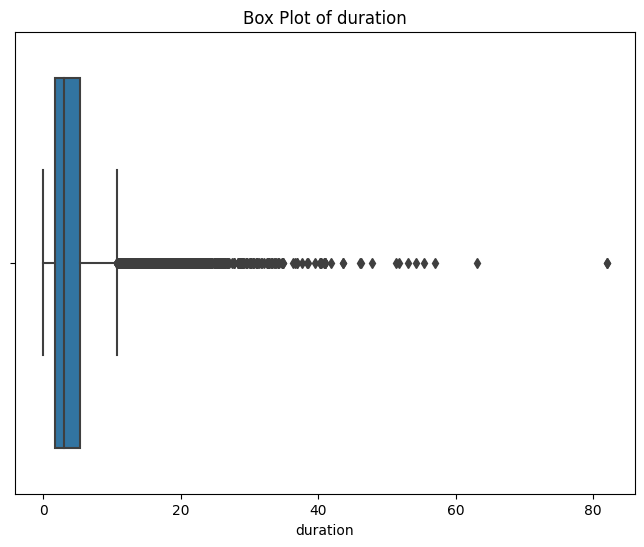

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=test, x='duration')
plt.xlabel('duration')
plt.title('Box Plot of duration')
plt.show()

### Feature 10: Campaign

In [ ]:
print(df.campaign.min())
print(df.campaign.max())

1
58


In [ ]:
fig = px.histogram(df, x='campaign', title='Count of Each campaign',
                   opacity=0.8, color_discrete_sequence=['cornflowerblue'])
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
print(test.campaign.min())
print(test.campaign.max())

1
63


In [ ]:
fig = px.histogram(test, x='campaign', title='Count of Each campaign',
                   opacity=0.8, color_discrete_sequence=['cornflowerblue'])
fig.update_layout(bargap=0.2)
fig.show()

### Feature 11: pdays

#### Train Data

In [ ]:
print(df.pdays.min())
print(df.pdays.max())

-1
999


In [ ]:
fig = px.histogram(df, x='pdays', title='Count of Each pdays',
                   opacity=0.8, color_discrete_sequence=['cornflowerblue'])
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# Loop through the 'pdays' column and replace 999 with -1
for index, row in df.iterrows():
    if row['pdays'] == 999:
        df.at[index, 'pdays'] = -1

In [ ]:
print(df.pdays.min())
print(df.pdays.max())

-1
871


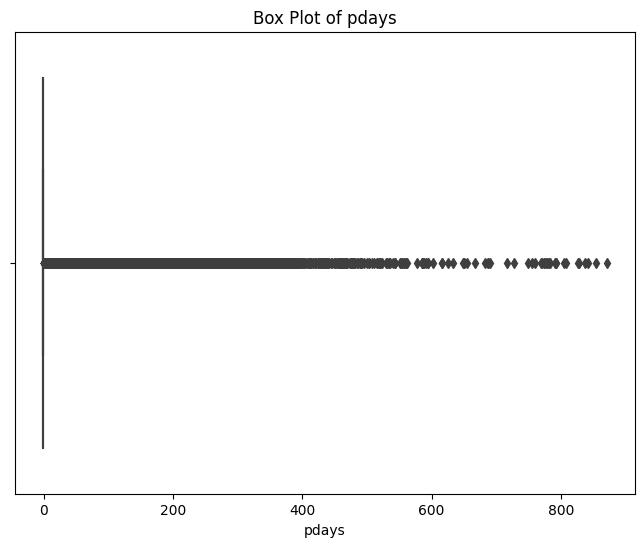

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='pdays')
plt.xlabel('pdays')
plt.title('Box Plot of pdays')
plt.show()

#### Test Data

In [ ]:
print(test.pdays.min())
print(test.pdays.max())

-1
999


In [ ]:
fig = px.histogram(test, x='pdays', title='Count of Each pdays',
                   opacity=0.8, color_discrete_sequence=['cornflowerblue'])
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# Loop through the 'pdays' column and replace 999 with -1
for index, row in test.iterrows():
    if row['pdays'] == 999:
        test.at[index, 'pdays'] = -1

In [ ]:
print(test.pdays.min())
print(test.pdays.max())

-1
850


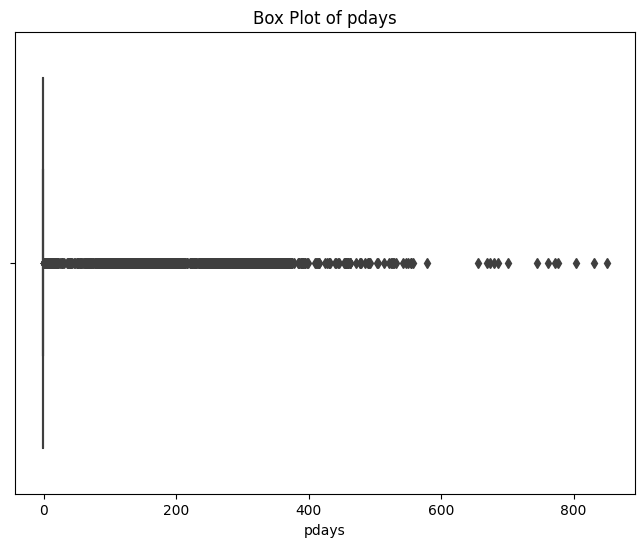

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=test, x='pdays')
plt.xlabel('pdays')
plt.title('Box Plot of pdays')
plt.show()

### Feature 12: Previous

#### Train Data

In [ ]:
# Assuming your DataFrame is named 'df'
df['previous'].value_counts().sort_index()

0     45758
1      4513
2      1921
3       913
4       529
5       327
6       197
7       133
8        91
9        67
10       48
11       49
12       33
13       30
14       13
15       12
16        8
17       10
18        5
19        8
20        5
21        3
22        4
23        6
24        3
25        4
26        1
27        5
28        2
29        4
30        2
35        1
37        2
38        1
40        1
41        1
51        1
58        1
Name: previous, dtype: int64

In [ ]:
# Identify values with less than 3 counts
low_count_values = df['previous'].value_counts()[df['previous'].value_counts() < 3].index

# Replace low count values with the mean
df.loc[df['previous'].isin(low_count_values), 'previous'] = int(df['previous'].mean())

print(df['previous'])


0        1
1        0
2        0
3        0
4        0
        ..
54707    0
54708    0
54709    0
54710    1
54711    1
Name: previous, Length: 54712, dtype: int64


In [ ]:
# Assuming your DataFrame is named 'df'
df['previous'].value_counts().sort_index()

0     45771
1      4513
2      1921
3       913
4       529
5       327
6       197
7       133
8        91
9        67
10       48
11       49
12       33
13       30
14       13
15       12
16        8
17       10
18        5
19        8
20        5
21        3
22        4
23        6
24        3
25        4
27        5
29        4
Name: previous, dtype: int64

#### Test Data

In [ ]:
test['previous'].value_counts().sort_index()

0      19612
1       1932
2        791
3        404
4        245
5        146
6         85
7         73
8         38
9         25
10        19
11        16
12        11
13         8
14         6
15         8
16         5
17         5
18         1
19         3
20         3
21         1
22         2
23         2
24         2
26         1
30         1
32         1
38         1
55         1
275        1
Name: previous, dtype: int64

In [ ]:
# Identify values with less than 3 counts
low_count_values = test['previous'].value_counts()[test['previous'].value_counts() < 3].index

# Replace low count values with the mean
test.loc[test['previous'].isin(low_count_values), 'previous'] = int(test['previous'].mean())

print(test['previous'])


0        0
1        0
2        0
3        0
4        0
        ..
23444    0
23445    0
23446    0
23447    0
23448    0
Name: previous, Length: 23449, dtype: int64


In [ ]:
test['previous'].value_counts().sort_index()

0     19626
1      1932
2       791
3       404
4       245
5       146
6        85
7        73
8        38
9        25
10       19
11       16
12       11
13        8
14        6
15        8
16        5
17        5
19        3
20        3
Name: previous, dtype: int64

### Feature 13: Poutcome

#### Train Data

In [ ]:
# Checking the value counts
df['poutcome'].value_counts()

unknown        26057
nonexistent    19704
failure         5809
success         1855
other           1287
Name: poutcome, dtype: int64

#### Test Data

In [ ]:
# Checking the value counts
test['poutcome'].value_counts()

unknown        10902
nonexistent     8712
failure         2521
success          761
other            553
Name: poutcome, dtype: int64

### Feature 14: month

#### Train Data

In [ ]:
# Checking the value counts
df['poutcome'].value_counts()

unknown        26057
nonexistent    19704
failure         5809
success         1855
other           1287
Name: poutcome, dtype: int64

In [ ]:
# List of valid months
valid_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Loop through the rows of the DataFrame
for index, row in df.iterrows():
    month_value = row['month']
    day_value = row['day']

    if month_value not in valid_months and day_value in valid_months:
        df.at[index, 'month'] = day_value

In [ ]:
# Drop 'day' column
df.drop(['day'], axis=1, inplace=True)

#### Test Data

In [ ]:
# Checking the value counts
test['poutcome'].value_counts()

unknown        10902
nonexistent     8712
failure         2521
success          761
other            553
Name: poutcome, dtype: int64

In [ ]:
# List of valid months
valid_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Loop through the rows of the DataFrame
for index, row in test.iterrows():
    month_value = row['month']
    day_value = row['day']

    if month_value not in valid_months and day_value in valid_months:
        test.at[index, 'month'] = day_value

In [ ]:
# Drop 'day' column
test.drop(['day'], axis=1, inplace=True)

### save data

In [ ]:
df

,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,Target,new_loan
0,47,blue-collar,married,secondary,no,1221.856962,cellular,apr,9.716667,2,-1,1,failure,no,yes
1,48,management,divorced,tertiary,no,351.000000,cellular,apr,12.083333,3,-1,0,unknown,no,yes
2,38,technician,single,secondary,no,1371.223621,cellular,aug,1.233333,2,-1,0,nonexistent,no,no
3,50,management,divorced,tertiary,no,1270.000000,cellular,may,0.400000,3,-1,0,unknown,no,yes
4,54,self-employed,married,secondary,no,1583.319149,cellular,aug,15.066667,3,-1,0,nonexistent,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,management,married,tertiary,no,750.000000,cellular,aug,3.883333,12,-1,0,unknown,no,yes
54708,31,services,married,secondary,no,1210.712386,telephone,may,10.600000,6,-1,0,nonexistent,no,no
54709,35,management,married,tertiary,no,323.000000,cellular,jan,4.350000,2,-1,0,unknown,yes,no
54710,70,retired,married,secondary,no,616.000000,cellular,apr,2.483333,2,182,1,failure,no,no


In [ ]:
# file_path = 'my_dataframe.csv'
# df.to_csv(file_path, index=False)

# # Download the CSV file
# files.download(file_path)

# Data Scaling

In [ ]:

# Copying original dataframe
train = df.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'campaign', 'duration', 'previous']
train[num_cols] = scaler.fit_transform(train[num_cols])

train.head()

,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,Target,new_loan
0,0.608840,blue-collar,married,secondary,no,-0.056051,cellular,apr,1.275983,-0.229190,-1,0.427783,failure,no,yes
1,0.703677,management,divorced,tertiary,no,-0.426655,cellular,apr,1.832262,0.107874,-1,-0.283524,unknown,no,yes
2,-0.244693,technician,single,secondary,no,0.007514,cellular,aug,-0.717999,-0.229190,-1,-0.283524,nonexistent,no,no
3,0.893351,management,divorced,tertiary,no,-0.035563,cellular,may,-0.913872,0.107874,-1,-0.283524,unknown,no,yes
4,1.272699,self-employed,married,secondary,no,0.097774,cellular,aug,2.533485,0.107874,-1,-0.283524,nonexistent,yes,yes


In [ ]:

# Copying original dataframe
test_new = test.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'campaign', 'duration', 'previous']
test_new[num_cols] = scaler.fit_transform(test_new[num_cols])

test_new

,id,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,new_loan
0,74249,-0.614925,admin.,married,tertiary,no,-0.102452,cellular,jul,0.022032,-0.569313,-1,-0.301449,nonexistent,no
1,35779,-0.899996,management,single,tertiary,no,-0.512018,cellular,aug,0.992958,-0.229216,-1,-0.301449,unknown,yes
2,66769,-1.185067,blue-collar,single,secondary,no,-0.117675,telephone,may,0.864509,-0.229216,-1,-0.301449,nonexistent,no
3,27888,1.570620,admin.,divorced,secondary,no,0.236279,cellular,nov,-0.155530,-0.569313,-1,-0.301449,unknown,yes
4,63306,1.380572,management,divorced,tertiary,no,-0.463093,cellular,aug,-0.601325,0.110881,-1,-0.301449,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,-0.424877,blue-collar,married,primary,no,-0.077105,telephone,may,-0.215977,0.791074,-1,-0.301449,nonexistent,no
23445,39745,0.335312,services,married,secondary,no,-0.525997,cellular,jan,-0.219755,0.110881,-1,-0.301449,unknown,no
23446,40150,-0.899996,blue-collar,married,secondary,no,-0.081553,cellular,jul,1.246079,-0.569313,-1,-0.301449,nonexistent,yes
23447,6012,0.240288,management,divorced,secondary,no,0.147058,cellular,nov,0.860731,-0.229216,-1,-0.301449,nonexistent,yes


In [ ]:
# df=df.drop(["pdays"],axis=1)
# test_new=test_new.drop(["pdays"],axis=1)

In [ ]:
test_new

,id,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,new_loan
0,74249,-0.614925,admin.,married,tertiary,no,-0.102452,cellular,jul,0.022032,-0.569313,-1,-0.301449,nonexistent,no
1,35779,-0.899996,management,single,tertiary,no,-0.512018,cellular,aug,0.992958,-0.229216,-1,-0.301449,unknown,yes
2,66769,-1.185067,blue-collar,single,secondary,no,-0.117675,telephone,may,0.864509,-0.229216,-1,-0.301449,nonexistent,no
3,27888,1.570620,admin.,divorced,secondary,no,0.236279,cellular,nov,-0.155530,-0.569313,-1,-0.301449,unknown,yes
4,63306,1.380572,management,divorced,tertiary,no,-0.463093,cellular,aug,-0.601325,0.110881,-1,-0.301449,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,-0.424877,blue-collar,married,primary,no,-0.077105,telephone,may,-0.215977,0.791074,-1,-0.301449,nonexistent,no
23445,39745,0.335312,services,married,secondary,no,-0.525997,cellular,jan,-0.219755,0.110881,-1,-0.301449,unknown,no
23446,40150,-0.899996,blue-collar,married,secondary,no,-0.081553,cellular,jul,1.246079,-0.569313,-1,-0.301449,nonexistent,yes
23447,6012,0.240288,management,divorced,secondary,no,0.147058,cellular,nov,0.860731,-0.229216,-1,-0.301449,nonexistent,yes


In [ ]:
df

,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,Target,new_loan
0,47,blue-collar,married,secondary,no,1221.856962,cellular,apr,9.716667,2,-1,1,failure,no,yes
1,48,management,divorced,tertiary,no,351.000000,cellular,apr,12.083333,3,-1,0,unknown,no,yes
2,38,technician,single,secondary,no,1371.223621,cellular,aug,1.233333,2,-1,0,nonexistent,no,no
3,50,management,divorced,tertiary,no,1270.000000,cellular,may,0.400000,3,-1,0,unknown,no,yes
4,54,self-employed,married,secondary,no,1583.319149,cellular,aug,15.066667,3,-1,0,nonexistent,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,management,married,tertiary,no,750.000000,cellular,aug,3.883333,12,-1,0,unknown,no,yes
54708,31,services,married,secondary,no,1210.712386,telephone,may,10.600000,6,-1,0,nonexistent,no,no
54709,35,management,married,tertiary,no,323.000000,cellular,jan,4.350000,2,-1,0,unknown,yes,no
54710,70,retired,married,secondary,no,616.000000,cellular,apr,2.483333,2,182,1,failure,no,no


In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default','contact','month','new_loan', 'poutcome']
for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col])
    test_new[col] = label_encoder.transform(test_new[col])


In [ ]:
test_new

,id,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,new_loan
0,74249,-0.614925,0,1,4,0,-0.102452,0,5,0.022032,-0.569313,-1,-0.301449,1,0
1,35779,-0.899996,4,2,4,0,-0.512018,0,1,0.992958,-0.229216,-1,-0.301449,4,1
2,66769,-1.185067,1,2,3,0,-0.117675,1,8,0.864509,-0.229216,-1,-0.301449,1,0
3,27888,1.570620,0,0,3,0,0.236279,0,9,-0.155530,-0.569313,-1,-0.301449,4,1
4,63306,1.380572,4,0,4,0,-0.463093,0,1,-0.601325,0.110881,-1,-0.301449,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,-0.424877,1,1,1,0,-0.077105,1,8,-0.215977,0.791074,-1,-0.301449,1,0
23445,39745,0.335312,7,1,3,0,-0.525997,0,4,-0.219755,0.110881,-1,-0.301449,4,0
23446,40150,-0.899996,1,1,3,0,-0.081553,0,5,1.246079,-0.569313,-1,-0.301449,1,1
23447,6012,0.240288,4,0,3,0,0.147058,0,9,0.860731,-0.229216,-1,-0.301449,1,1


In [ ]:
test_new

,id,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,new_loan
0,74249,-0.614925,0,1,4,0,-0.102452,0,5,0.022032,-0.569313,-1,-0.301449,1,0
1,35779,-0.899996,4,2,4,0,-0.512018,0,1,0.992958,-0.229216,-1,-0.301449,4,1
2,66769,-1.185067,1,2,3,0,-0.117675,1,8,0.864509,-0.229216,-1,-0.301449,1,0
3,27888,1.570620,0,0,3,0,0.236279,0,9,-0.155530,-0.569313,-1,-0.301449,4,1
4,63306,1.380572,4,0,4,0,-0.463093,0,1,-0.601325,0.110881,-1,-0.301449,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,-0.424877,1,1,1,0,-0.077105,1,8,-0.215977,0.791074,-1,-0.301449,1,0
23445,39745,0.335312,7,1,3,0,-0.525997,0,4,-0.219755,0.110881,-1,-0.301449,4,0
23446,40150,-0.899996,1,1,3,0,-0.081553,0,5,1.246079,-0.569313,-1,-0.301449,1,1
23447,6012,0.240288,4,0,3,0,0.147058,0,9,0.860731,-0.229216,-1,-0.301449,1,1


# 4. Splitting & Preprocessing the data


In [ ]:
# train.drop(['duration'], axis=1, inplace=True)
# test_new.drop(['duration'], axis=1, inplace=True)

In [ ]:
# Separate features (X) and target (y) for training
X_train = train.drop(columns=['Target'])
y_train = train['Target']

X_test = test_new # Keep all features for prediction


In [ ]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'new_loan'],
      dtype='object')

In [ ]:
X_test.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'new_loan'],
      dtype='object')

In [ ]:
# Step 4: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# upsampling


In [ ]:
# Separate majority and minority classes
df_majority = train[train['Target'] == 'no']
df_minority = train[train['Target'] == 'yes']

# Upsample the minority class (yes) to have the same number of instances as the majority class (no)
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=47991,  # Number of samples to match majority class
                                 random_state=42)  # Set random state for reproducibility

# Combine the majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check the class distribution after upsampling
print(df_upsampled['Target'].value_counts())

# Reset the index of the upsampled DataFrame
df_upsampled.reset_index(drop=True, inplace=True)

# Update the 'Target' column in the original DataFrame 'df' with the upsampled values
df['Target'] = df_upsampled['Target']

# Check the class distribution in the original DataFrame 'df' after upsampling
print(df['Target'].value_counts())


no     48433
yes    47991
Name: Target, dtype: int64
no     48433
yes     6279
Name: Target, dtype: int64


In [ ]:
train

,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,Target,new_loan
0,0.608840,1,1,3,0,-0.056051,0,0,1.275983,-0.229190,-1,0.427783,0,no,1
1,0.703677,4,0,4,0,-0.426655,0,0,1.832262,0.107874,-1,-0.283524,4,no,1
2,-0.244693,9,2,3,0,0.007514,0,1,-0.717999,-0.229190,-1,-0.283524,1,no,0
3,0.893351,4,0,4,0,-0.035563,0,8,-0.913872,0.107874,-1,-0.283524,4,no,1
4,1.272699,6,1,3,0,0.097774,0,1,2.533485,0.107874,-1,-0.283524,1,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,-0.529204,4,1,4,0,-0.256856,0,1,-0.095125,3.141450,-1,-0.283524,4,no,1
54708,-0.908552,7,1,3,0,-0.060793,1,8,1.483608,1.119066,-1,-0.283524,1,no,0
54709,-0.529204,4,1,4,0,-0.438571,0,4,0.014564,-0.229190,-1,-0.283524,4,yes,0
54710,2.790091,5,1,3,0,-0.313881,0,0,-0.424190,-0.229190,182,0.427783,0,no,0


In [ ]:
df_upsampled

,age,job,marital,education,default,balance,contact,month,duration,campaign,pdays,previous,poutcome,Target,new_loan
0,0.608840,1,1,3,0,-0.056051,0,0,1.275983,-0.229190,-1,0.427783,0,no,1
1,0.703677,4,0,4,0,-0.426655,0,0,1.832262,0.107874,-1,-0.283524,4,no,1
2,-0.244693,9,2,3,0,0.007514,0,1,-0.717999,-0.229190,-1,-0.283524,1,no,0
3,0.893351,4,0,4,0,-0.035563,0,8,-0.913872,0.107874,-1,-0.283524,4,no,1
4,1.746884,5,1,1,0,-0.750934,0,4,-0.126464,-0.566254,-1,-0.283524,4,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96419,-0.529204,0,2,4,0,-0.090526,0,9,2.509981,-0.566254,-1,-0.283524,1,yes,0
96420,-0.055019,1,1,1,0,-0.457721,0,8,2.968322,0.107874,-1,-0.283524,4,yes,1
96421,-1.477574,9,2,3,0,-0.516875,0,4,-0.216566,-0.566254,91,0.427783,3,yes,1
96422,2.790091,5,1,3,0,0.519797,1,0,-0.161721,-0.229190,-1,-0.283524,4,yes,0


In [ ]:
df['Target'].value_counts()

no     48433
yes     6279
Name: Target, dtype: int64

In [ ]:
df_upsampled['Target'].value_counts()

no     48433
yes    47991
Name: Target, dtype: int64

# SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Training and evaluation

## Logistic Reg - upsambling

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score
# import pandas as pd

# # Step 5: Build the machine learning model (Logistic Regression)
# logreg_classifier = LogisticRegression(random_state=42)
# logreg_classifier.fit(X_train, y_train)

# # Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
# y_val_pred = logreg_classifier.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# # Display scores in a table
# cv_scores = cross_val_score(logreg_classifier, X_train, y_train, cv=5, scoring='accuracy')
# cv_f1_scores = cross_val_score(logreg_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

# scores_table = pd.DataFrame({
#     'Train Accuracy': [cv_scores.mean()],
#     'Validation Accuracy': [val_accuracy],
#     'Test Accuracy': ['-'],  # No true test labels available
#     'Validation F1 Score': [val_f1_score],
#     'Cross-Validation F1 Score': [cv_f1_scores.mean()]
# })
# print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0         0.75784             0.755665             -              0.75529   

   Cross-Validation F1 Score  
0                   0.757435  


## 1. Random Forest

In [ ]:
# Step 5: Build the machine learning model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.904978             0.904597             -             0.894907   

   Cross-Validation F1 Score  
0                   0.894832  


### Rf - with upsambling

In [ ]:
# # Step 5: Build the machine learning model
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_train, y_train)

# # Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
# y_val_pred = rf_classifier.predict(X_val)
# val_accuracy = (y_val_pred == y_val).mean()
# val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# # Display scores in a table
# cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
# cv_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

# scores_table = pd.DataFrame({
#     'Train Accuracy': [cv_scores.mean()],
#     'Validation Accuracy': [val_accuracy],
#     'Test Accuracy': ['-'],  # No true test labels available
#     'Validation F1 Score': [val_f1_score],
#     'Cross-Validation F1 Score': [cv_f1_scores.mean()]
# })
# print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.962328              0.96531             -             0.965284   

   Cross-Validation F1 Score  
0                   0.962283  


In [ ]:
# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test_new.drop('id', axis=1)

y_pred = rf_classifier.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test_new['id'], 'Target': y_pred})
submission_df['Target'] = submission_df['Target'].replace({'yes': 1, 'no': 0})

# Save the submission DataFrame to a CSV file
file_path = 'submission_rf_classifier.csv'
submission_df.to_csv(file_path, index=False)

# Optionally, you can print the first few rows of the DataFrame to verify the content
print(submission_df.head())


      id  Target
0  74249       0
1  35779       0
2  66769       0
3  27888       0
4  63306       0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# hyperparameter change n_estimators=50,random_state=0, min_samples_leaf=10,max_depth=20
# Step 5: Build the machine learning model
rf_classifier = RandomForestClassifier(n_estimators=50,random_state=0, min_samples_leaf=10,max_depth=20)
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)

   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.905847             0.905876             -             0.893262   

   Cross-Validation F1 Score  
0                   0.893052  


In [ ]:
# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test_new.drop('id', axis=1)

y_pred = rf_classifier.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test_new['id'], 'Target': y_pred})
submission_df['Target'] = submission_df['Target'].replace({'yes': 1, 'no': 0})

# Save the submission DataFrame to a CSV file
file_path = 'submission_rf_classifier.csv'
submission_df.to_csv(file_path, index=False)

# Optionally, you can print the first few rows of the DataFrame to verify the content
print(submission_df.head())

# Optionally, if you are using Google Colab, you can download the CSV file
from google.colab import files
files.download(file_path)

      id  Target
0  74249       0
1  35779       0
2  66769       0
3  27888       0
4  63306       0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### check overfitting

In [ ]:
# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)







Training Accuracy: 0.999974072777713
Validation Accuracy: 0.9653098262898626
Training F1 Score: 0.9999740727792902
Validation F1 Score: 0.9652844313250825


### Rf - with downsamling

In [ ]:
# Step 5: Build the machine learning model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.903906             0.903999             -             0.894909   

   Cross-Validation F1 Score  
0                   0.894047  


### Rf - SMOTE

In [ ]:
# # Step 5: Build the machine learning model
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_train_balanced, y_train_balanced)

# # Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
# y_val_pred = rf_classifier.predict(X_val)
# val_accuracy = (y_val_pred == y_val).mean()

# val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# # Display scores in a table
# cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
# cv_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

# scores_table = pd.DataFrame({
#     'Train Accuracy': [cv_scores.mean()],
#     'Validation Accuracy': [val_accuracy],
#     'Test Accuracy': ['-'],  # No true test labels available
#     'Validation F1 Score': [val_f1_score],
#     'Cross-Validation F1 Score': [cv_f1_scores.mean()]
# })
# print(scores_table)


In [ ]:
# # Step 5: Build the machine learning model
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_train_balanced, y_train_balanced)

# # Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
# y_val_pred = rf_classifier.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)

# val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# # Display scores in a table
# cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
# cv_f1_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

# scores_table = pd.DataFrame({
#     'Train Accuracy': [cv_scores.mean()],
#     'Validation Accuracy': [val_accuracy],
#     'Test Accuracy': ['-'],  # No true test labels available
#     'Validation F1 Score': [val_f1_score],
#     'Cross-Validation F1 Score': [cv_f1_scores.mean()]
# })
# print(scores_table)


## 2. XGBOOST

In [ ]:


# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
xgb = XGBClassifier(n_estimators=30, random_state=42)
xgb.fit(X_train, y_train)

# Step 7: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = xgb.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.907217             0.907155             -             0.899667   

   Cross-Validation F1 Score  
0                   0.899448  


In [ ]:
# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test.drop('id', axis=1)

y_pred = xgb.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission = pd.DataFrame({'id': test['id'], 'Target': y_pred})
submission['Target'] = submission['Target'].replace({'yes': 1, 'no': 0})
submission.to_csv("new_submission.csv", index=False)


### XGboost - upsambling

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
xgb_classifier = XGBClassifier(n_estimators=30, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)





Training Accuracy: 0.925015421873929
Validation Accuracy: 0.9078863200219318
Training F1 Score: 0.9190367262128928
Validation F1 Score: 0.9003176617762705


In [ ]:
# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test.drop('id', axis=1)

y_pred = xgb.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission = pd.DataFrame({'id': test['id'], 'Target': y_pred})
submission['Target'] = submission['Target'].replace({'yes': 1, 'no': 0})
submission.to_csv("Sample_Submition-xg-upsample.csv", index=False)





In [ ]:
submission

,id,Target
0,74249,0
1,35779,1
2,66769,0
3,27888,0
4,63306,0
...,...,...
23444,902,0
23445,39745,0
23446,40150,1
23447,6012,0


In [ ]:

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
xgb_classifier = XGBClassifier(n_estimators=30, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)


Training Accuracy: 0.925015421873929
Validation Accuracy: 0.9078863200219318
Training F1 Score: 0.9190367262128928
Validation F1 Score: 0.9003640659905937


In [ ]:
# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
xgb_classifier = XGBClassifier(n_estimators=30, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)

Training Accuracy: 0.925015421873929
Validation Accuracy: 0.9078863200219318
Training F1 Score: 0.9190367262128928
Validation F1 Score: 0.9003176617762705


In [ ]:
from sklearn.model_selection import GridSearchCV
model = XGBClassifier(n_estimators=100, random_state=24, n_jobs=2,scale_pos_weight=(89/11)) #Hyperparameter tuning was created due to the imbalanced target data. .

params = {
    "n_estimators":[10,30,50],
    "max_depth":[1,2,3,4],
    "scale_pos_weight":[(80/20), (85/15), (90/10)]
}
gcv = GridSearchCV(model, params, verbose=1, cv=5, scoring="roc_auc")
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=2,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=24, ...),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [10, 30, 50],
                         'scale_pos_weight': [4.0, 5.666666666666667, 9.0]},
             scoring='roc_auc', verbose=1)

In [ ]:
gcv.best_params_


{'max_depth': 4, 'n_estimators': 50, 'scale_pos_weight': 4.0}

In [ ]:
gcv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=2, num_parallel_tree=None, predictor=None,
              random_state=24, ...)

In [ ]:
# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model

xgb_classifier = XGBClassifier(max_depth=4, n_estimators=50, n_jobs=2, random_state=24,scale_pos_weight= 4.0)

# You can use the xgb_classifier instance in your code now

xgb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)

Training Accuracy: 0.8845301469076287
Validation Accuracy: 0.8806542995522252
Training F1 Score: 0.895616589502107
Validation F1 Score: 0.8914723186004081


In [ ]:
# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test_new.drop('id', axis=1)

y_pred = xgb_classifier.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test_new['id'], 'Target': y_pred})
submission_df['Target'] = submission_df['Target'].replace({'yes': 1, 'no': 0})

# Save the submission DataFrame to a CSV file
file_path = 'submission_xgb_classifier.csv'
submission_df.to_csv(file_path, index=False)

# Optionally, you can print the first few rows of the DataFrame to verify the content
print(submission_df.head())



      id  Target
0  74249       0
1  35779       1
2  66769       0
3  27888       0
4  63306       0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model

xgb_classifier = XGBClassifier(max_depth=4, n_estimators=50, n_jobs=2, random_state=24,scale_pos_weight= 4.0)

# You can use the xgb_classifier instance in your code now

xgb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)



Training Accuracy: 0.8817884804313555
Validation Accuracy: 0.8718815681257425
Training F1 Score: 0.8809410387342033
Validation F1 Score: 0.8698649671386456


In [ ]:
from sklearn.model_selection import learning_curve

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
xgb_classifier = XGBClassifier(n_estimators=30, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    xgb_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Error Curve
train_errors = 1 - train_mean
val_errors = 1 - val_mean

# Plot Learning Curve and Error Curve
plt.figure(figsize=(12, 6))

# Learning Curve
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()

# Error Curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_errors, color='blue', marker='o', markersize=5, label='Training Error')
plt.plot(train_sizes, val_errors, color='green', linestyle='--', marker='s', markersize=5, label='Validation Error')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.title('Error Curve')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

### XG - with downsamling

In [ ]:


# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
xgb = XGBClassifier(n_estimators=30, random_state=42)
xgb.fit(X_train, y_train)

# Step 7: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = xgb.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.906624             0.904736             -             0.897704   

   Cross-Validation F1 Score  
0                   0.899492  


In [ ]:
# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test.drop('id', axis=1)

y_pred = rf_classifier.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test['id'], 'Target': y_pred})
submission_df['Target'] = submission_df['Target'].replace({'yes': 1, 'no': 0})
# Save the submission DataFrame to a CSV file

submission_file = 'new_submission.csv'
submission_df = pd.read_csv(submission_file)

# Optionally, you can print the first few rows of the DataFrame to verify the content
print(submission_df.head())



### XG - with SMOTE

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Assuming you already have the DataFrame 'df' with features and the original 'Target' column
# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Step 1: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 2: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to balance the target data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 4: Build the machine learning model
xgb = XGBClassifier(n_estimators=30, random_state=42)
xgb.fit(X_train_balanced, y_train_balanced)

# Step 5: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = xgb.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(xgb, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(xgb, X_train_balanced, y_train_balanced, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.889398             0.862195             -             0.876324   

   Cross-Validation F1 Score  
0                   0.889112  


## Decision Tree

In [ ]:
# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = dt_classifier.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.866344             0.870602             -             0.871346   

   Cross-Validation F1 Score  
0                     0.8679  


## Adaboost

In [ ]:
# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = adaboost_classifier.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(adaboost_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(adaboost_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.898238             0.897743             -             0.883434   

   Cross-Validation F1 Score  
0                   0.884473  


In [ ]:
# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test_new.drop('id', axis=1)

y_pred = adaboost_classifier.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test_new['id'], 'Target': y_pred})
submission_df['Target'] = label_encoder.inverse_transform(submission_df['Target'])  # Convert numerical labels back to 'yes' and 'no'

# Save the submission DataFrame to a CSV file
file_path = 'submission_adaboost_classifier.csv'
submission_df.to_csv(file_path, index=False)

# Optionally, you can print the first few rows of the DataFrame to verify the content
print(submission_df.head())

# Optionally, if you are using Google Colab, you can download the CSV file
from google.colab import files
files.download(file_path)

      id  Target
0  74249       0
1  35779       0
2  66769       0
3  27888       0
4  63306       0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# GridSearch

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model (AdaBoost)
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, scoring='f1_weighted', cv=5)

# Fit the model on training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Step 7: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = best_estimator.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
scores_table = pd.DataFrame({
    'Train Accuracy': [grid_search.best_score_],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [grid_search.best_score_]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.888644             0.902312             -             0.889668   

   Cross-Validation F1 Score  
0                   0.888644  


In [ ]:
print(best_params)

{'learning_rate': 1.0, 'n_estimators': 150}


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model using the best parameters
best_params = {'n_estimators': 150, 'learning_rate': 1.0}  # Replace with actual best parameters
adaboost_classifier = AdaBoostClassifier(**best_params, random_state=42)

# Fit the model on training data
adaboost_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test_new.drop('id', axis=1)

y_pred = adaboost_classifier.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test_new['id'], 'Target': y_pred})
submission_df['Target'] = label_encoder.inverse_transform(submission_df['Target'])  # Convert numerical labels back to 'yes' and 'no'

# Save the submission DataFrame to a CSV file
file_path = 'submission_adaboost_classifier.csv'
submission_df.to_csv(file_path, index=False)

# Optionally, you can print the first few rows of the DataFrame to verify the content
print(submission_df.head())

# Optionally, if you are using Google Colab, you can download the CSV file
from google.colab import files
files.download(file_path)

      id  Target
0  74249       0
1  35779       0
2  66769       0
3  27888       0
4  63306       0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.GradientBoostingClassifier

In [ ]:


# Step 5: Build the machine learning model
clf = GradientBoostingClassifier(n_estimators=30, learning_rate=1.0, max_depth=1, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = clf.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)


   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.899107             0.899845             -             0.886484   

   Cross-Validation F1 Score  
0                   0.885444  


In [ ]:
# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test.drop('id', axis=1)

y_pred = clf.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test['id'], 'Target': y_pred})

# Save the submission DataFrame to a CSV file
file_path = 'submission_clf.csv'
submission_df.to_csv(file_path, index=False)

# Optionally, you can print the first few rows of the DataFrame to verify the content
print(submission_df.head())

# Optionally, if you are using Google Colab, you can download the CSV file
from google.colab import files
files.download(file_path)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Step 6: Make predictions on the validation set to calculate validation accuracy and F1 score
y_val_pred = knn.predict(X_val)
val_accuracy = (y_val_pred == y_val).mean()
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Display scores in a table
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_weighted')

scores_table = pd.DataFrame({
    'Train Accuracy': [cv_scores.mean()],
    'Validation Accuracy': [val_accuracy],
    'Test Accuracy': ['-'],  # No true test labels available
    'Validation F1 Score': [val_f1_score],
    'Cross-Validation F1 Score': [cv_f1_scores.mean()]
})
print(scores_table)

   Train Accuracy  Validation Accuracy Test Accuracy  Validation F1 Score  \
0        0.893692             0.893265             -             0.880057   

   Cross-Validation F1 Score  
0                   0.880064  


In [ ]:
## Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test_new.drop('id', axis=1)

y_pred = knn.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test_new['id'], 'Target': y_pred})
submission_df['Target'] = submission_df['Target'].replace({'yes': 1, 'no': 0})

# Save the submission DataFrame to a CSV file
file_path = 'submission_knn.csv'
submission_df.to_csv(file_path, index=False)

# Optionally, you can print the first few rows of the DataFrame to verify the content
print(submission_df.head())

# Optionally, if you are using Google Colab, you can download the CSV file
from google.colab import files
files.download(file_path)

      id  Target
0  74249       0
1  35779       0
2  66769       0
3  27888       0
4  63306       0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## RandomForestClassifier feature ranking

In [ ]:
#Using RandomForestClassifier for the binary classification Problem.

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=350,
                                random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking on the basis of RandomForestClassifier

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s: %f " % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. duration: 0.322642 
2. balance: 0.124013 
3. age: 0.123479 
4. month: 0.100291 
5. job: 0.058291 
6. pdays: 0.055505 
7. poutcome: 0.052327 
8. campaign: 0.047473 
9. education: 0.029854 
10. previous: 0.028313 
11. marital: 0.023614 
12. new_loan: 0.019245 
13. contact: 0.010644 
14. default: 0.004309 


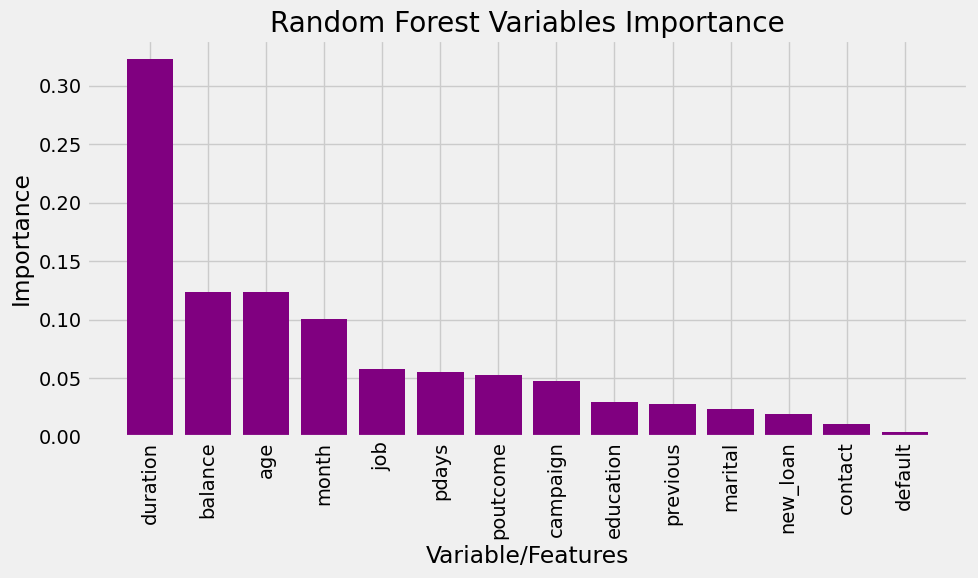

In [ ]:

# Sort indices based on feature importances in descending order
sorted_importances = [importances[i] for i in np.argsort(importances)[::-1]]
sorted_features = [features[i] for i in sorted_indices]

# Set the style
plt.style.use('fivethirtyeight')

# Make a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(range(len(importances)), sorted_importances,color = 'purple', orientation='vertical')

# Tick labels for x axis
plt.xticks(range(len(importances)), sorted_features, rotation=90)

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable/Features')
plt.title('Random Forest Variables Importance')

# Automatically adjust subplot parameters for a tight layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('Random-Forest-Variables-Importances.jpg', dpi=600)

# Display the plot
plt.show()


## ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# You can use the extra_trees_classifier instance in your code now
extra_trees_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the training set
y_train_pred = extra_trees_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = extra_trees_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)


Training Accuracy: 0.9999543055587288
Validation Accuracy: 0.9001187974047337
Training F1 Score: 0.9999543095258846
Validation F1 Score: 0.8855711794509318


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
extra_trees_classifier = ExtraTreesClassifier(random_state=42, class_weight='balanced')

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Use F1 score as the scoring metric for GridSearchCV
scoring = make_scorer(f1_score, average='weighted')

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=extra_trees_classifier, param_grid=param_grid, scoring=scoring, cv=5)

# Fit the model on training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the training set
y_train_pred = best_estimator.predict(X_train)

# Make predictions on the validation set
y_val_pred = best_estimator.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the best parameters and scores
print("Best Parameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Training Accuracy: 0.9857661815440152
Validation Accuracy: 0.8968290231198026
Training F1 Score: 0.98612487772887
Validation F1 Score: 0.8974389134456267


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
extra_trees_classifier = ExtraTreesClassifier(random_state=42, class_weight='balanced')

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=extra_trees_classifier, param_distributions=param_dist, n_iter=10,
                                   scoring='f1_weighted', cv=5, random_state=42)

# Fit the model on training data using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator from RandomizedSearchCV
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Make predictions on the training set
y_train_pred = best_estimator.predict(X_train)

# Make predictions on the validation set
y_val_pred = best_estimator.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the best parameters and scores
print("Best Parameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}
Training Accuracy: 0.9463775731682241
Validation Accuracy: 0.88010600383807
Training F1 Score: 0.9506261473008123
Validation F1 Score: 0.8889485520102081


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model
extra_trees_classifier = ExtraTreesClassifier(min_samples_split=10, n_estimators=200,max_depth=None)

# You can use the extra_trees_classifier instance in your code now
extra_trees_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the training set
y_train_pred = extra_trees_classifier.predict(X_train)

# Make predictions on the validation set
y_val_pred = extra_trees_classifier.predict(X_val)

# Evaluate the model's performance on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Print the scores to check for overfitting
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", val_f1_score)

Training Accuracy: 0.9572300029701387
Validation Accuracy: 0.9036827195467422
Training F1 Score: 0.9531801946407034
Validation F1 Score: 0.8873006638995266


In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Step 5: Convert target variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Step 6: Build the machine learning model using the best parameters from RandomizedSearchCV

extra_trees_classifier = ExtraTreesClassifier(min_samples_split=10, n_estimators=200,max_depth=None)

# Fit the model on training data
extra_trees_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
# Remove the 'id' column from the test data
X_test = test_new.drop('id', axis=1)

y_pred = extra_trees_classifier.predict(X_test)

# Create a DataFrame with 'id' and predicted 'Target'
submission_df = pd.DataFrame({'id': test_new['id'], 'Target': y_pred})
submission_df['Target'] = label_encoder.inverse_transform(submission_df['Target'])  # Convert numerical labels back to 'yes' and 'no'

# Save the submission DataFrame to a CSV file
file_path = 'submission_extra_trees_classifier.csv'
submission_df.to_csv(file_path, index=False)

# print the first few rows of the DataFrame
print(submission_df.head())

# download the CSV file
from google.colab import files
files.download(file_path)

      id  Target
0  74249       0
1  35779       0
2  66769       0
3  27888       0
4  63306       0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>